In [1]:
'''
回顾感知机模型练习
'''

'\n回顾感知机模型练习\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

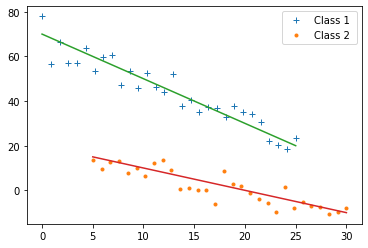

In [3]:
'''
初始化两类点
'''
X1 = np.linspace( 0, 25, 30)
X2 = np.linspace(5, 30, 30)

Y1 = -2 * X1 + 70 + np.random.normal(scale=5, size=X1.shape)
Y2 = -X2 + 20 + np.random.normal(scale=5, size=X1.shape)

Rale_Y1 = -2 * X1 + 70
Rale_Y2 =- X2 + 20

# 绘制点图
plt.plot(X1, Y1, '+', label = 'Class 1 ')
plt.plot(X2, Y2, '.', label = 'Class 2 ')

# 绘制真真实数据的直线
plt.plot(X1, Rale_Y1)
plt.plot(X2, Rale_Y2)
plt.legend()

In [4]:
# 将创建的两类点整合到一个DataFrame中
C1 = pd.DataFrame([X1, Y1, np.ones(X1.shape)]).T
C2 = pd.DataFrame([X2, Y2, np.ones(X2.shape)*-1]).T
data = np.array(pd.concat([C1, C2]))

# X, Y 分别表示训练数据及其对应的训练标线
X, Y = data[:, :-1], data[:, -1]

In [5]:
# 感知机类
class Perceptron:
    # 构造函数
    def __init__(self) :
        self.alpha = 0.05
        self.paras = []
        
    # 超平面的函数
    def f_x(self, x):
        return np.dot(self.W, x) + self.b    
    
    # 训练函数
    def fit(self, X, Y):
        # 初始化参数
        self.W = np.ones(X.shape[1], dtype=np.float32)
        self.b = 0
        x0_mean = np.mean(X[0])
        x1_mean = np.mean(X[1])
        self.W[0] = x1_mean / x0_mean
        print('\n W = ', self.W, '\n self.b = ', self.b)
        
        # 开始训练
        finish = False
        while not finish:
            
            finish = True
            for index in range(len(X)):
                x = X[index]
                y = Y[index]
                
                # 表示误分类的点
                if y * self.f_x(x) < 0:
                    # 进行迭代
                    self.W = self.W + self.alpha * x * y
                    self.b = self.b + self.alpha * y
                    finish = False
                    
                    self.paras.append((self.W, self.b))
                    
            if finish :
                return 'Perceptron training completed!'
            

In [6]:
model = Perceptron()
model.fit(X, Y)
print(model.W, model.b)


 W =  [0.73446107 1.        ] 
 self.b =  0
[-0.03278031  1.06697189] -14.500000000000071


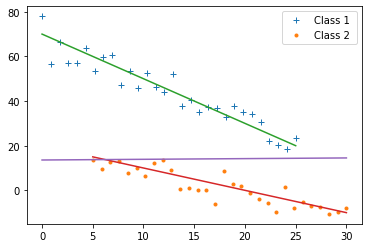

In [7]:
# 绘制点图
plt.plot(X1, Y1, '+', label = 'Class 1 ')
plt.plot(X2, Y2, '.', label = 'Class 2 ')

# 绘制真真实数据的直线
# plt.plot(X1, Rale_Y1)
# plt.plot(X2, Rale_Y2)

# 绘制超平面
x_points = np.linspace(0, 30, 10)
y_points = -(model.W[0]*x_points + model.b)/model.W[1];
plt.plot(x_points, y_points)
plt.legend()

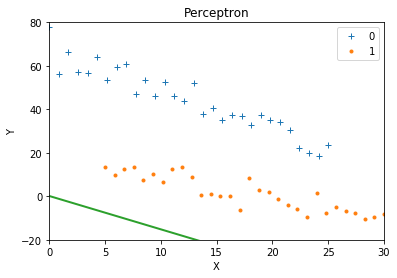

In [8]:
# 制作动画
import matplotlib.animation as animation
from IPython.display import HTML
%matplotlib inline

fig = plt.figure()
ax = plt.axes(xlim =(0, 30), ylim=(-20, 80))

ax.plot(data[:30, 0], data[:30, 1], '+', label = '0')
ax.plot(data[30:60, 0], data[30:60, 1], '.', label = '1')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Perceptron')
ax.legend(loc = 'upper right')

line,  = ax.plot([], [], lw = 2)
def update(para):
    W = para[0]
    b = para[1]
    
    X_points = np.linspace(0, 30, 10)
    Y_points = -(W[0] * X_points + b) / W[1]
    line.set_data(X_points, Y_points)
ani = animation.FuncAnimation(fig, update, model.paras)

HTML(ani.to_html5_video())

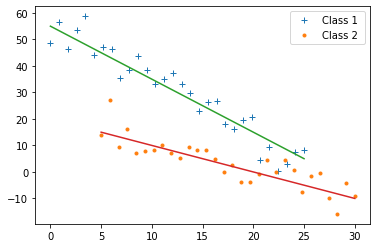

In [9]:
'''
初始化两类点
'''
X1 = np.linspace( 0, 25, 30)
X2 = np.linspace(5, 30, 30)

Y1 = -2 * X1 + 55 + np.random.normal(scale=5, size=X1.shape)
Y2 = -X2 + 20 + np.random.normal(scale=5, size=X1.shape)

Rale_Y1 = -2 * X1 + 55
Rale_Y2 =- X2 + 20

# 绘制点图
plt.plot(X1, Y1, '+', label = 'Class 1 ')
plt.plot(X2, Y2, '.', label = 'Class 2 ')

# 绘制真真实数据的直线
plt.plot(X1, Rale_Y1)
plt.plot(X2, Rale_Y2)
plt.legend()

In [10]:
# 将创建的两类点整合到一个DataFram中
C1 = pd.DataFrame([X1, Y1, np.ones(X1.shape)]).T
C2 = pd.DataFrame([X2, Y2, np.ones(X2.shape)*-1]).T
data = np.array(pd.concat([C1, C2]))

# X, Y 分别表示训练数据及其对应的训练标线
X, Y = data[:, :-1], data[:, -1]

In [11]:
from sklearn.linear_model import Perceptron
model = Perceptron(max_iter = 1000, tol=None)
model.fit(X, Y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=None,
           validation_fraction=0.1, verbose=0, warm_start=False)

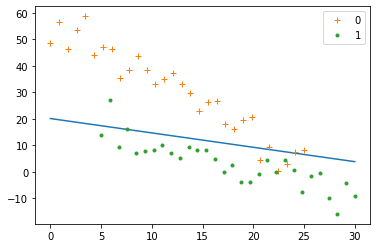

In [12]:
%matplotlib inline 
X_points = np.linspace(0, 30,10)
Y_points = -(model.coef_[0][0] * X_points + model.intercept_)/model.coef_[0][1]
plt.plot(X_points, Y_points)
plt.plot(X1, Y1, '+', label='0')
plt.plot(X2, Y2, '.', label='1')
plt.legend()

In [25]:
# 感知机类
# 增加了如果不能完全分类就提前结束
class EnhancedPerceptron:
    # 构造函数
    def __init__(self) :
        self.alpha = 0.02
        self.paras = []
        self.count = 0
        
    # 超平面的函数
    def f_x(self, x):
        return np.dot(self.W, x) + self.b    
    
    # 训练函数
    def fit(self, X, Y, max_iter=1000):
        # 初始化参数
        self.W = np.ones(X.shape[1], dtype=np.float32)
        self.b = 0
        x0_mean = np.mean(X[0])
        x1_mean = np.mean(X[1])
        self.W[0] = x1_mean / x0_mean
        print('\n W = ', self.W, '\n b = ', self.b)
        
        # 开始训练
        finish = False
        while not finish:
            self.count += 1
            finish = True
            for index in range(len(X)):
                x = X[index]
                y = Y[index]
                
                if y * self.f_x(x) < 0:
                    self.W = self.W + self.alpha * x * y
                    self.b = self.b + self.alpha * y
                    finish = False
                    
                    self.paras.append((self.W, self.b))
                    
            if finish :
                return 'Perceptron training completed!'
            
            if self.count > max_iter:
                return 'Time OUT'
            


 W =  [1.1803612 1.       ] 
 b =  0
Time OUT
[1.33553357 0.78129778] -39.58000000000059


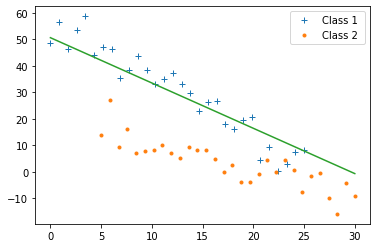

In [37]:
model = EnhancedPerceptron()
print(model.fit(X, Y,max_iter= 5000 ))
print(model.W, model.b)

# 绘制点图
plt.plot(X1, Y1, '+', label = 'Class 1 ')
plt.plot(X2, Y2, '.', label = 'Class 2 ')

# 绘制超平面
x_points = np.linspace(0, 30, 10)
y_points = -(model.W[0]*x_points + model.b)/model.W[1];
plt.plot(x_points, y_points)
plt.legend()